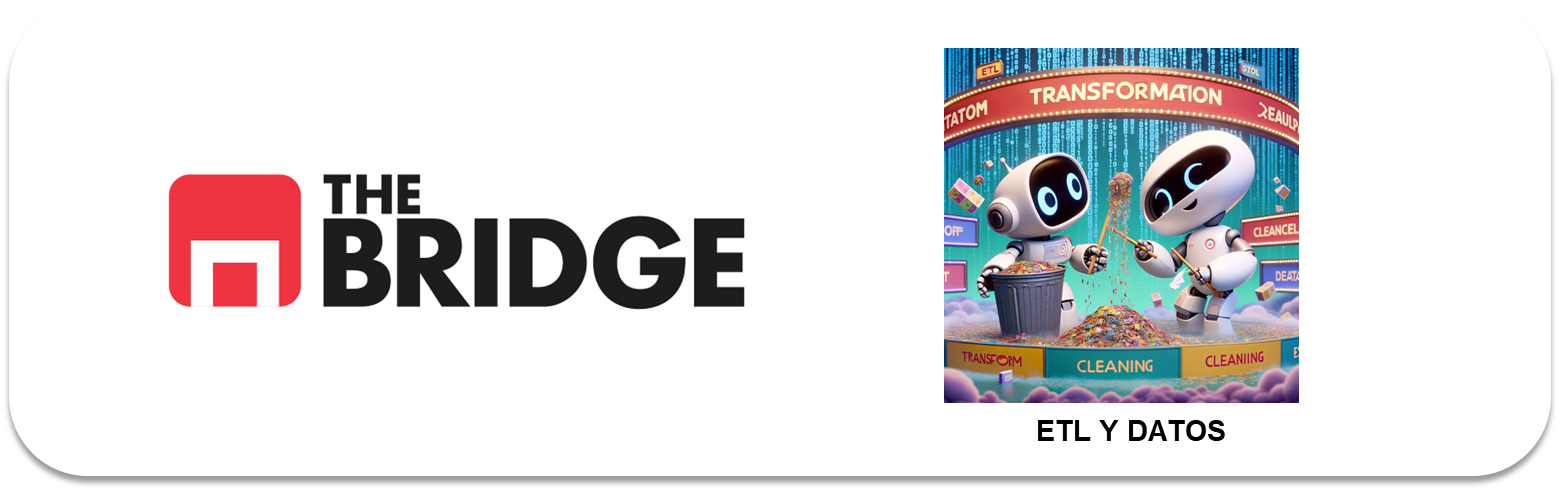

## PRACTICA OBLIGATORIA: Acceso Ficheros

* La práctica obligatoria de esta unidad consiste en varios ejercicios con tres tipos de ficheros (txt,excel y xml). Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

## #0 Qué fichero para qué cosa

La librería `os` proporciona una serie de funciones para trabajar con archivos y hacer operaciones del sistema operativo. Importa la librería y haz uso de la función `listdir` para poder ver los ficheros que hay en el subdirectorio `data` que acompaña a este notebook.

In [5]:
import os

# os.listdir(directorio>) da una lista de los archivos contenidos en <directorio>
# prueba a ejecutar lo siguiente
for fichero in os.listdir("./data"):
    print(fichero)

OptaF24.xml
city_sales - copy.xlsx
city_sales.xlsx
mbox.txt
city_sales_copia_Carlos.xlsx
spam.csv


1. Ahora crea una variable `fichero_texto`, otra `fichero_excel` y otra `fichero_xml` y asigna a cada una la ruta para acceder a cada tipo de fichero que te hayas encontrado en la salida del apartado anterior. Como recordarás una ruta es el camino para acceder a un fichero, en este caso incluye el path y el nombre del fichero (ojo os.listdir no te da el path, te da el nombre del fichero)

In [7]:
fichero_texto = "./data/mbox.txt"
fichero_excel = "./data/city_sales.xlsx"
fichero_excel_copy = "./data/city_sales - copy.xlsx"
fichero_xml = "./data/OptaF24.xml"

## #1 Fichero excel

Vamos a empezar trabajando con el fichero excel. 

1. Importa las librerías necesarias y carga los datos en un `DataFrame` el fichero cuya ruta has asignado a `fichero_excel`. Usa los argumentos necesarios para una correcta lectura

In [6]:
import pandas as pd

df_excel = pd.read_excel(fichero_excel)

df_excel

NameError: name 'fichero_excel' is not defined

2. Renombra la primera columna para que se llame "revenue" y la columna "num" por "sales"

In [4]:
#Creo que hay un error, y lo que se pretende es que la 1ª columna se llame "date"
df_excel.columns.values[0] = "date"

#No hay columna "Num"

df_excel

NameError: name 'df_excel' is not defined

3. Muestra los tipos de datos, valores totales, etc.

In [10]:
df_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     40000 non-null  datetime64[ns]
 1   revenue  40000 non-null  int64         
 2   sales    40000 non-null  int64         
 3   city     40000 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 1.2+ MB


4. Convierte el campo "date" a un datetime. Conviertelo en el índice del `DataFrame`

In [3]:
import datetime as dt

df_excel["date"] = pd.to_datetime(df_excel["date"])

df_excel.index = df_excel["date"] 

df_excel

NameError: name 'pd' is not defined

5. Muestra las ventas agrupadas por ciudad entre 2017 y 2018 y lo mismo con los ingresos ("revenue")

In [2]:
fecha_inicio = "2017-01-01"
fecha_fin = "2018-12-31"

df_filtrado = df_excel[(df_excel["date"] >= fecha_inicio) & (df_excel["date"] <= fecha_fin)]

df_filtrado

NameError: name 'df_excel' is not defined

5. Sobreescribe el fichero excel guardando el dataframe sin indice, pero sin perder la columna "date" en una hoja de nombre "clean_data"

In [1]:
df_filtrado.to_excel("./data/city_sales_copia_Carlos.xlsx", sheet_name = "clean_data", index=False)

df_filtrado

NameError: name 'df_filtrado' is not defined

## #2 Texto

Vamos a leer ahora el fichero indicado en la ruta contenida en `fichero_texto`, el objetivo es procesar el contenido para construir un `DataFrame` con las siguientes columnas direcciones de correo del emisor, veredicto de si es spam o no y confidencia en ese veredicto.

1. Crea un diccionario con las siguientes claves: "from","to","is_spam","confidence" y que cada una tenga una lista vacia.

In [ ]:
dicc_txt = {
    "from" : [],
    "to" : [],
    "is_spam" : []
}

{'from': [], 'to': [], 'is_spam': []}

2. Lee el fichero (usando `with open...`) y muestra las primeras 60 filas por pantalla, así podrás ver como es más o menos la estructura del mismo

In [ ]:
with open (fichero_texto, "r") as f:
    for i in range(60):
        linea = f.readline()
        print(linea, end = "")

From stephen.marquard@uct.ac.za Sat Jan  5 09:14:16 2008
Return-Path: <postmaster@collab.sakaiproject.org>
Received: from murder (mail.umich.edu [141.211.14.90])
	 by frankenstein.mail.umich.edu (Cyrus v2.3.8) with LMTPA;
	 Sat, 05 Jan 2008 09:14:16 -0500
X-Sieve: CMU Sieve 2.3
Received: from murder ([unix socket])
	 by mail.umich.edu (Cyrus v2.2.12) with LMTPA;
	 Sat, 05 Jan 2008 09:14:16 -0500
Received: from holes.mr.itd.umich.edu (holes.mr.itd.umich.edu [141.211.14.79])
	by flawless.mail.umich.edu () with ESMTP id m05EEFR1013674;
	Sat, 5 Jan 2008 09:14:15 -0500
Received: FROM paploo.uhi.ac.uk (app1.prod.collab.uhi.ac.uk [194.35.219.184])
	BY holes.mr.itd.umich.edu ID 477F90B0.2DB2F.12494 ; 
	 5 Jan 2008 09:14:10 -0500
Received: from paploo.uhi.ac.uk (localhost [127.0.0.1])
	by paploo.uhi.ac.uk (Postfix) with ESMTP id 5F919BC2F2;
	Sat,  5 Jan 2008 14:10:05 +0000 (GMT)
Message-ID: <200801051412.m05ECIaH010327@nakamura.uits.iupui.edu>
Mime-Version: 1.0
Content-Transfer-Encoding: 7bit
R

In [ ]:
with open (fichero_texto, "r") as f:
    texto = f.readlines()

with open (fichero_texto, "r") as f:
    texto2 = [linea2.replace("\n", "") for linea2 in f]

df_texto = pd.texto2

['From stephen.marquard@uct.ac.za Sat Jan  5 09:14:16 2008\n', 'Return-Path: <postmaster@collab.sakaiproject.org>\n', 'Received: from murder (mail.umich.edu [141.211.14.90])\n', '\t by frankenstein.mail.umich.edu (Cyrus v2.3.8) with LMTPA;\n', '\t Sat, 05 Jan 2008 09:14:16 -0500\n', 'X-Sieve: CMU Sieve 2.3\n', 'Received: from murder ([unix socket])\n', '\t by mail.umich.edu (Cyrus v2.2.12) with LMTPA;\n', '\t Sat, 05 Jan 2008 09:14:16 -0500\n', 'Received: from holes.mr.itd.umich.edu (holes.mr.itd.umich.edu [141.211.14.79])\n', '\tby flawless.mail.umich.edu () with ESMTP id m05EEFR1013674;\n', '\tSat, 5 Jan 2008 09:14:15 -0500\n', 'Received: FROM paploo.uhi.ac.uk (app1.prod.collab.uhi.ac.uk [194.35.219.184])\n', '\tBY holes.mr.itd.umich.edu ID 477F90B0.2DB2F.12494 ; \n', '\t 5 Jan 2008 09:14:10 -0500\n', 'Received: from paploo.uhi.ac.uk (localhost [127.0.0.1])\n', '\tby paploo.uhi.ac.uk (Postfix) with ESMTP id 5F919BC2F2;\n', '\tSat,  5 Jan 2008 14:10:05 +0000 (GMT)\n', 'Message-ID: <20

3. Ahora sabemos que el emisor viene después de "To:" el receptor después de "From:" el resultado de Spam tras "X-DSPAM-Result" y el nivel de confianza tras "X-DSPAM-Confidence", crea un programa que lea el fichero y a medida que va leyendo el texto añada cada valor (emisor, receptor, si es spam o no, nivel de confianza) a cada una de las listas del diccionario creado en 1.  
Por ejemplo, cuando llegue a una línea con "To:" que añada el correo a <diccionario>["to"]

4. Recorre el diccionario y muestra el número de valores de cada lista (no los valores, ojo). Es para que compruebes que todos tienen la misma longitud

Si las cuatro listas no te salen de la misma longitud, repasa el código del apartado anterior.

5. Ahora ya crea un dataframe a partir del diccionario y muestra si hay algún correo declarado como spam y la confianza media. (quizá tengas que cambiar el tipo de la columna)

6. Grába el dataframe en un fichero csv en la ruta "./data/spam.csv" con el "|" de separador y sin índice:

## #3 XML

Es hora de procesar el fichero con la ruta xml. Carga las liberias necesarias:

In [75]:
import xml.etree.ElementTree as et

1. Lee el fichero tal y como has visto hacerlo en el workout, con la función `parse` de la libería adecuada (la que has importado en la celda superior)

In [76]:
tree = et.parse(fichero_xml)


In [77]:
with open(fichero_xml, "r") as f:
    for line in f:
        print(line, end = "")

<?xml version="1.0" encoding="UTF-8"?>
<!-- Copyright 2001-2012 Opta Sportsdata Ltd. All rights reserved. -->

<!-- PRODUCTION HEADER
     produced on:        valde-jobq-a03.nexus.opta.net
     production time:    20120911T092033,103Z
     production module:  Opta::Feed::XML::Soccer::F24
-->
<Games timestamp="2012-09-11T10:20:32">
  <Game id="360481" away_team_id="43" away_team_name="Manchester City" competition_id="8" competition_name="English Barclays Premier League" game_date="2011-08-21T16:00:00" home_team_id="30" home_team_name="Bolton Wanderers" matchday="2" period_1_start="2011-08-21T16:00:38" period_2_start="2011-08-21T17:03:47" season_id="2011" season_name="Season 2011/2012">
    <Event id="301038339" event_id="1" type_id="34" period_id="16" min="0" sec="0" team_id="43" outcome="1" x="0.0" y="0.0" timestamp="2011-08-21T15:23:06.696" last_modified="2011-08-21T15:54:56">
      <Q id="2028397186" qualifier_id="130" value="4" />
      <Q id="1518776786" qualifier_id="227" value="0

2. Asigna el nodo raíz a la variable `ejer_raiz` y muestra su etiqueta (y sus atributos, si es que tiene)

In [78]:
ejer_raiz = tree.getroot()
ejer_raiz.tag

'Games'

In [80]:
for elemento in ejer_raiz.iter():
    print(elemento.tag)

Games
Game
Event
Q
Q
Q
Q
Q
Q
Q
Event
Q
Q
Q
Q
Q
Q
Q
Event
Q
Event
Q
Event
Q
Q
Q
Q
Q
Event
Q
Q
Q
Q
Q
Event
Q
Q
Event
Q
Event
Q
Event
Q
Event
Q
Q
Q
Q
Q
Q
Event
Q
Q
Q
Q
Q
Q
Event
Q
Q
Event
Q
Q
Event
Q
Q
Q
Q
Q
Q
Event
Q
Q
Q
Q
Q
Event
Q
Q
Q
Q
Q
Event
Q
Q
Q
Q
Q
Q
Event
Q
Q
Event
Q
Event
Q
Q
Q
Event
Q
Q
Event
Q
Q
Q
Q
Q
Q
Q
Q
Q
Q
Event
Q
Q
Event
Q
Q
Event
Q
Q
Q
Q
Q
Q
Q
Q
Event
Q
Q
Q
Q
Q
Q
Q
Event
Q
Event
Q
Event
Q
Event
Q
Event
Q
Event
Q
Q
Q
Q
Q
Event
Q
Event
Event
Event
Q
Q
Q
Q
Q
Event
Q
Q
Q
Q
Q
Q
Q
Event
Q
Q
Q
Q
Q
Q
Event
Q
Event
Q
Q
Q
Q
Q
Q
Event
Q
Q
Event
Q
Q
Event
Q
Q
Q
Q
Q
Q
Q
Q
Q
Event
Q
Q
Q
Q
Event
Q
Event
Q
Event
Q
Q
Q
Q
Q
Q
Event
Q
Q
Q
Q
Q
Q
Event
Q
Q
Event
Event
Q
Q
Q
Q
Q
Event
Q
Q
Q
Q
Q
Event
Q
Q
Q
Q
Q
Q
Q
Q
Event
Q
Event
Q
Event
Q
Q
Q
Q
Q
Q
Q
Event
Q
Q
Q
Q
Q
Q
Event
Event
Q
Event
Q
Event
Q
Q
Q
Q
Q
Q
Event
Q
Q
Q
Q
Q
Event
Q
Q
Q
Q
Q
Event
Q
Event
Q
Event
Q
Q
Q
Q
Q
Q
Q
Event
Q
Q
Q
Q
Q
Q
Q
Event
Q
Q
Q
Q
Q
Event
Q
Q
Q
Q
Q
Q
Event
Q
Q
Q
Q
Q
Q
Event
Q
Q
Q
Q
Q
Event
Q
Q
Q
Q
Q
Event
Q
Q
Eve

3. Muestra cuantos hijos y nietos tiene el nodo raiz y la etiqueta de cada uno:

In [2]:
for hijo in ejer_raiz:
    tabs = "\t"
    print(hijo.tag, hijo.attrib)
    for nieto in hijo:
        print(tabs, nieto.tag, nieto.text)

NameError: name 'ejer_raiz' is not defined

4. Habrás comprobado que del nodo raíz cuelgan 1673 nodos con tag "Event", encuentra uno (<nodo_raiz>.find("Event"), pero primero tendrás que encontrar un nodo raiz, pista raiz.find("Game") y de ahi...) y pinta sus atributos


In [68]:
atributos_raiz = root.attrib
print(atributos_raiz)

{'timestamp': '2012-09-11T10:20:32'}


5. Recorre de nuevo los eventos y crea un dataframe con las columnas de las claves del attrib de un "Event" y como valores los valores de los atributos de los 1673 eventos que hay colgando del nodo raíz.